# Word Embedding feature engineering

In [1]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\wanyi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_clean = pd.read_csv("C:/Users/wanyi/Desktop/Uchicago/Kaggle projects/Toxic Comments/Word Embedding (pre-model)/train_clean.csv")
test_clean  = pd.read_csv("C:/Users/wanyi/Desktop/Uchicago/Kaggle projects/Toxic Comments/Word Embedding (pre-model)/test_clean.csv")

In [3]:
### Train  
### finding all the rows not in str format but float 
train_clean_comment = train_clean.comment_text_clean.tolist()

train_list_not_string =[]
for i in range(len(train_clean_comment)):
    if type((train_clean_comment[i])) != str:
        train_list_not_string.append(i)

print(train_list_not_string)
        
for i in train_list_not_string:
    train_clean_comment[i] = str(train_clean_comment[i])

[4482, 23529, 151379]


In [4]:
### Test
### finding all the rows not in str format but float 

test_clean_comment = test_clean.comment_text_clean.tolist()

test_list_not_string =[]
for i in range(len(test_clean_comment)):
    if type((test_clean_comment[i])) != str:
        test_list_not_string.append(i)

print(test_list_not_string)
        
for i in test_list_not_string:
    test_clean_comment[i] = str(test_clean_comment[i])

[6533, 45734, 82422, 98165, 107815, 118017, 119922, 121816, 139225]


# Combine train and test together 

In [5]:
print(len(train_clean_comment), len(test_clean_comment))

159571 153163


In [6]:
combined = (train_clean_comment + test_clean_comment)

# Doc2Vec model

In [ ]:
max_epochs = 100
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
model.build_vocab(combined)

In [ ]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(combined,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [ ]:
model.save("toxic.combined.d2v.model")
print("Model Saved")

In [ ]:
from gensim.models.doc2vec import Doc2Vec
model= Doc2Vec.load("toxic.combined.d2v.model")

In [ ]:
d2v_list_combined = []
for i in range(len(combined)):
    d2v_list_combined.append(model.docvecs[i].tolist())

# Train doc2vec based on own trian dataset

In [ ]:
tagged_data_train = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[(i)]) for i, _d in enumerate(train_clean_comment)]
tagged_data_test = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[(i)]) for i, _d in enumerate(test_clean_comment)]

In [15]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data_train)

C:\Users\wanyi\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [16]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data_train,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0


C:\Users\wanyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [17]:
model.save("toxic.train.d2v.model")
print("Model Saved")

Model Saved


In [16]:
from gensim.models.doc2vec import Doc2Vec
model= Doc2Vec.load("toxic.train.d2v.model")

In [17]:
d2v_list_train = []
for i in range(len(train_clean_comment)):
    d2v_list_train.append(model.docvecs[i].tolist())

In [18]:
a = pd.DataFrame(d2v_list_train)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.684196,-7.172304,-2.806706,-3.145821,6.987401,1.788110,-2.732966,-0.563654,-3.918058,1.904755,-1.957033,0.534666,-0.964612,-2.653989,-4.015760,2.808512,1.764603,6.142101,-3.447417,-1.511905
1,-0.390054,-4.386533,-2.131487,1.094032,3.855737,-2.626902,-4.201839,-4.486324,-1.810591,-0.993393,-4.702813,-3.136093,0.779636,0.757914,-1.238328,-2.045277,0.546471,-2.411158,0.084265,-5.252426
2,6.465429,-2.894805,-6.346100,-5.431806,0.857631,-0.901943,-0.813791,-2.436920,-1.552713,-1.378949,0.425247,0.579477,-4.540270,1.558311,0.737403,-3.733265,-2.592389,9.017025,-2.887040,-3.215480
3,3.194785,-0.670035,-3.057459,-0.315029,8.629707,0.885820,-4.299379,-3.415068,-1.233831,-3.843613,1.494226,4.887568,-0.724399,4.741945,-2.217118,-0.993535,1.542564,-2.130059,-4.893396,-1.376003
4,4.443181,0.835123,1.207921,1.613802,-1.610805,-2.545195,2.777239,-1.472636,-1.492803,-4.236603,-5.336557,-1.125132,0.833627,-3.837846,2.983262,0.747181,-0.262058,2.791092,-3.998071,-2.189060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,-4.390086,-1.790366,-3.413918,1.895631,5.265527,0.961061,1.439573,-4.900720,0.603062,-5.715709,-8.323190,0.209219,-2.617171,6.166942,-0.328357,3.333582,0.810533,-0.516419,-2.937032,-0.883551
159567,0.671036,-4.867218,2.028809,-3.751267,-1.602428,-2.085096,2.629291,0.951828,-2.513001,-1.604717,-3.805840,-7.245111,-0.857358,-2.441849,1.889701,-0.801500,-1.741104,1.069351,-3.224479,-1.970961
159568,-3.061448,-4.550220,-3.195795,-2.685481,2.681088,-0.525121,-4.982052,3.111648,0.211798,-0.718929,-5.320312,1.775576,-0.228616,-3.421994,3.317983,-6.807216,0.348742,1.131370,1.826323,-1.012262
159569,-0.027129,-5.711600,-1.354861,0.337082,4.535312,-1.021333,-6.801951,1.852875,-2.032740,-3.354227,-0.619819,0.611934,-1.373542,-0.517902,0.937812,0.897780,3.914562,0.660858,-9.422826,-2.776195


In [20]:
a.to_csv("train_word_embedding.csv")

# Train doc2vec based on test dataset 

In [10]:
max_epochs = 100
vec_size = 20
alpha = 0.025


model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                workers = 4)
  
model.build_vocab(tagged_data_test)

C:\Users\wanyi\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [11]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data_test,
                total_examples=model.corpus_count,
                epochs=model.iter)

iteration 0


C:\Users\wanyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [12]:
model.save("toxic.test.d2v.model")
print("Model Saved")

Model Saved


In [13]:
from gensim.models.doc2vec import Doc2Vec
model= Doc2Vec.load("toxic.test.d2v.model")

In [15]:
d2v_list_test = []
for i in range(len(test_clean_comment)):
    d2v_list_test.append(model.docvecs[i].tolist())

In [16]:
b = pd.DataFrame(d2v_list_test)

In [17]:
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.806273,2.769480,7.929344,6.675649,-4.706311,-6.996445,-2.345618,5.439607,3.213091,-0.147735,2.606749,1.204772,1.163972,-3.164969,-2.037645,-4.959217,2.644438,3.311262,0.382187,-3.623845
1,-3.577630,-1.245620,2.017711,-1.328124,-0.995497,4.083107,1.539543,1.210770,1.773511,-1.068523,0.808555,-0.978705,2.303217,-0.609376,-3.437952,1.372475,-0.543199,1.762328,-5.951749,5.469892
2,-1.444373,1.720569,2.746601,-2.560223,-0.753479,-0.504860,1.496460,1.334342,2.013787,-2.275791,2.979666,-2.608837,1.853521,0.797301,2.468640,1.595606,2.137445,0.585808,0.345775,3.401003
3,-1.564404,-1.902157,3.825459,0.768180,0.641610,2.699550,5.056608,3.369725,9.162048,-2.424457,-4.356404,-4.019630,6.717706,0.528337,4.252129,1.493853,-0.110166,-0.165753,8.116542,-0.088203
4,-3.371700,-3.006193,3.719841,0.349276,-0.257635,-2.669048,0.160589,-1.104226,1.793853,0.493737,-0.111781,-2.918790,1.834481,-0.849663,1.827916,0.467795,1.563572,-2.586368,0.781435,0.802089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153158,-0.170893,3.504349,2.870374,-0.552698,1.507403,-0.993096,0.676894,-0.861931,2.504536,-2.958490,1.815544,0.398441,3.405276,-0.773539,-2.064767,0.931662,2.483968,-0.626348,-0.906814,1.856967
153159,3.719829,1.555865,0.091002,5.564526,1.222147,-2.037899,0.263615,-1.584570,4.887023,1.672040,3.946485,-0.172759,2.282086,4.637414,-3.195232,-2.353555,-4.089951,5.224297,0.751892,3.001931
153160,1.682727,-1.487592,3.519874,0.269769,7.871068,5.548923,-8.330526,-0.276777,-2.306298,-5.640341,-0.102955,-1.542186,5.428301,2.361869,-2.749600,1.079671,-1.181880,10.433649,0.154358,0.877934
153161,2.096318,-4.362475,4.954355,8.541159,6.343361,4.454705,-6.070333,-0.214468,2.582400,-1.916741,2.680521,1.028945,2.766598,6.826577,0.860334,-1.857750,3.300720,4.631460,4.969100,5.150886


In [18]:
b.to_csv("test_word_embedding.csv")

# Clustering _ train

In [37]:
train = pd.read_csv("C:/Users/wanyi/Desktop/Uchicago/Kaggle projects/Toxic Comments/Word Embedding (pre-model)/train_word_embedding.csv")

In [38]:
train_small = train.sample(frac=0.3)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

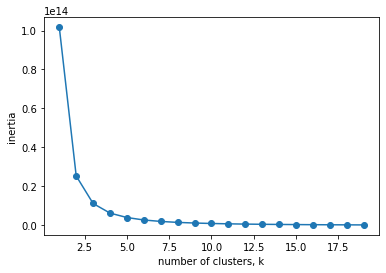

In [39]:
ks = range(1,20) 
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_jobs = -1)
    model.fit(train_small)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()

In [41]:
model = KMeans(n_clusters = 3, n_jobs = -1,random_state = 1)
labels = model.fit_predict(train_small)
print(labels)

[0 0 1 ... 2 2 1]


In [42]:
len(labels)

47871

In [19]:
train_small['label'] = labels

# DBSCAN 

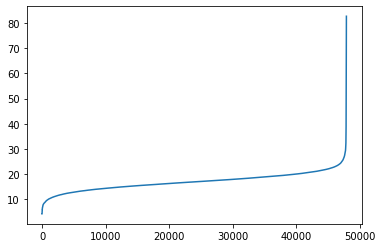

In [43]:


#Determine epsilon 
from sklearn.neighbors import NearestNeighbors
import math

nbrs = NearestNeighbors(n_neighbors = round(math.log(len(train_small))), n_jobs = -1).fit(train_small)
distances, indices = nbrs.kneighbors(train_small)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)



In [53]:
math.log(len(train_small))

10.776265172078537

In [70]:

from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 25 , min_samples = 21 ,n_jobs = -1).fit(train_small)
labels = dbsc.labels_

unique_labels = np.unique(labels)
print(unique_labels)



[-1  0  1  2  3  4  5  6]


# TSNE  

In [71]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,learning_rate = 100)
tsne_results = tsne.fit_transform(train_small)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 47871 samples in 0.203s...
[t-SNE] Computed neighbors for 47871 samples in 1.896s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47871
[t-SNE] Computed conditional probabilities for sample 2000 / 47871
[t-SNE] Computed conditional probabilities for sample 3000 / 47871
[t-SNE] Computed conditional probabilities for sample 4000 / 47871
[t-SNE] Computed conditional probabilities for sample 5000 / 47871
[t-SNE] Computed conditional probabilities for sample 6000 / 47871
[t-SNE] Computed conditional probabilities for sample 7000 / 47871
[t-SNE] Computed conditional probabilities for sample 8000 / 47871
[t-SNE] Computed conditional probabilities for sample 9000 / 47871
[t-SNE] Computed conditional probabilities for sample 10000 / 47871
[t-SNE] Computed conditional probabilities for sample 11000 / 47871
[t-SNE] Computed conditional probabilities for sample 12000 / 47871
[t-SNE] Computed conditional probabilities for sa

In [72]:
pd.DataFrame(tsne_results).to_csv("tsne_result.csv")

In [73]:
tsne_df = pd.read_csv("C:/Users/wanyi/Desktop/Uchicago/Kaggle projects/Toxic Comments/Word Embedding (pre-model)/tsne_result.csv")

In [76]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="0", y="1",
    hue="1",
    #palette=sns.color_palette("hls", 100),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

ValueError: Image size of 965x717742 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x720 with 1 Axes>